# Exercise 4.13

This question should be answered using the `Weekly` data set, which is part of the `ISLR2` package. This data is similar in nature to the `Smarket` data from this chapter's lab, except that it contains 1,089 weekly returns for 21 years, from the beginning of 1990 to the end of 2010.

## (a) Produce some numerical and graphical summaries of the `Weekly` data. Do there appear to be any patterns?

,Year,Lag1,Lag2,Lag3,Lag4,Lag5,Volume,Today
Year,1.00000000,-0.032289274,-0.03339001,-0.03000649,-0.031127923,-0.030519101,0.84194162,-0.032459894
Lag1,-0.03228927,1.000000000,-0.07485305,0.05863568,-0.071273876,-0.008183096,-0.06495131,-0.075031842
Lag2,-0.03339001,-0.074853051,1.00000000,-0.07572091,0.058381535,-0.072499482,-0.08551314,0.059166717
Lag3,-0.03000649,0.058635682,-0.07572091,1.00000000,-0.075395865,0.060657175,-0.06928771,-0.071243639
Lag4,-0.03112792,-0.071273876,0.05838153,-0.07539587,1.000000000,-0.075675027,-0.06107462,-0.007825873
Lag5,-0.03051910,-0.008183096,-0.07249948,0.06065717,-0.075675027,1.000000000,-0.05851741,0.011012698
Volume,0.84194162,-0.064951313,-0.08551314,-0.06928771,-0.061074617,-0.058517414,1.00000000,-0.033077783
Today,-0.03245989,-0.075031842,0.05916672,-0.07124364,-0.007825873,0.011012698,-0.03307778,1.000000000


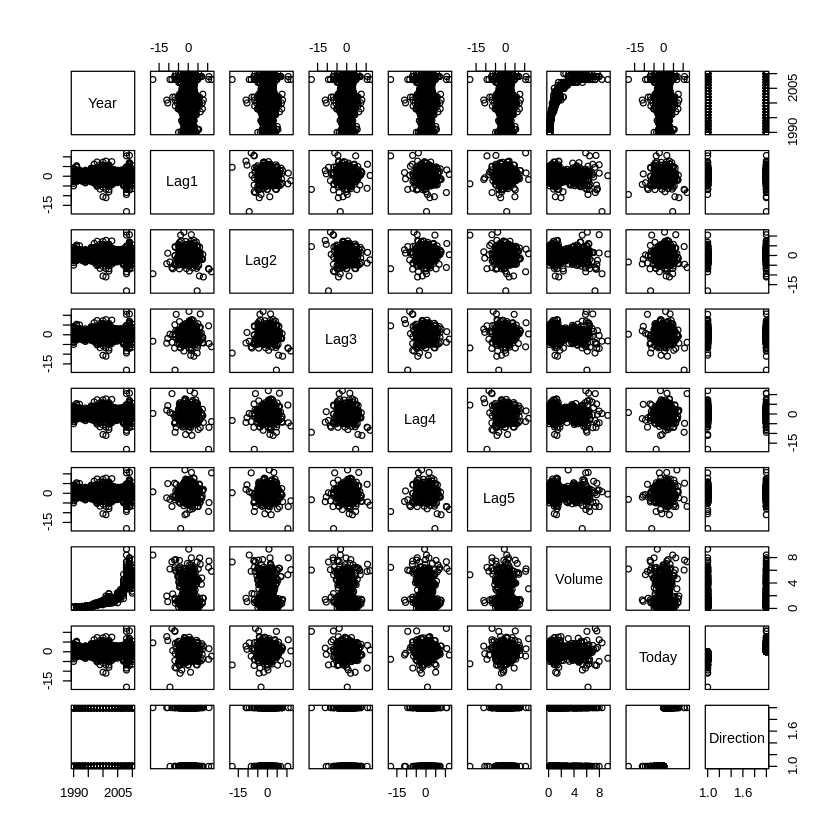

In [ ]:
cor(Weekly[, -9])
plot(Weekly)

The scatterplot suggests that `Volume` grows exponentially as `Year` increases.

## (b) Use the full data set to perform a logistic regression with `Direction` as the response and the five lag variables plus `Volume` as predictors. Use the summary function to print the results. Do any of the predictors appear to be statistically significant? If so, which ones?

In [ ]:
glm.fit <- glm(Direction ~ . - Year - Today, data=Weekly, family="binomial")
summary(glm.fit)


Call:
glm(formula = Direction ~ . - Year - Today, family = "binomial", 
    data = Weekly)

Coefficients:
            Estimate Std. Error z value Pr(>|z|)   
(Intercept)  0.26686    0.08593   3.106   0.0019 **
Lag1        -0.04127    0.02641  -1.563   0.1181   
Lag2         0.05844    0.02686   2.175   0.0296 * 
Lag3        -0.01606    0.02666  -0.602   0.5469   
Lag4        -0.02779    0.02646  -1.050   0.2937   
Lag5        -0.01447    0.02638  -0.549   0.5833   
Volume      -0.02274    0.03690  -0.616   0.5377   
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

(Dispersion parameter for binomial family taken to be 1)

    Null deviance: 1496.2  on 1088  degrees of freedom
Residual deviance: 1486.4  on 1082  degrees of freedom
AIC: 1500.4

Number of Fisher Scoring iterations: 4


Only `Lag2` appears to be statistically significant.

## (c) Compute the confusion matrix and overall fraction of correct predictions. Explain what the confusion matrix is telling you about the types of mistakes made by logistic regression.

In [ ]:
pred <- predict(glm.fit, type="response")
pred_class <- ifelse(pred > 0.5, "Up", "Down")
glm1_conf <- table(pred_class, Weekly$Direction)
glm1_accuracy <- mean(pred_class == Weekly["Direction"])

print(glm1_conf)
print(glm1_accuracy)
cat("Down:", glm1_conf[1] / (glm1_conf[1]+glm1_conf[2]), "\n")
cat("Up:", glm1_conf[4] / (glm1_conf[3]+glm1_conf[4]))

          
pred_class Down  Up
      Down   54  48
      Up    430 557
[1] 0.5610652
Down: 0.1115702 
Up: 0.9206612

The overall accuracy is 56%. The model predicts 'Up' days with 92% accuracy but poorly classifies 'Down' days with only 11% accuracy.

## (d) Now fit the logistic regression model using a training data period from 1990 to 2008, with `Lag2` as the only predictor. Compute the confusion matrix and the overall fraction of correct predictions for the held out data (that is, the data from 2009 and 2010).

In [ ]:
train_set <- Weekly[, "Year"] < 2009
glm.fit2 <- glm(Direction ~ Lag2, data=Weekly, subset=train_set, family="binomial")
summary(glm.fit2)

pred <- predict(glm.fit2, Weekly[!train_set,], type="response")
pred_class <- ifelse(pred > 0.5, "Up", "Down")
glm2_conf <- table(pred_class, Weekly[!train_set, "Direction"])
glm2_accuracy <- mean(pred_class == Weekly[!train_set, "Direction"])

print(glm2_conf)
print(glm2_accuracy)


Call:
glm(formula = Direction ~ Lag2, family = "binomial", data = Weekly, 
    subset = train_set)

Coefficients:
            Estimate Std. Error z value Pr(>|z|)   
(Intercept)  0.20326    0.06428   3.162  0.00157 **
Lag2         0.05810    0.02870   2.024  0.04298 * 
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

(Dispersion parameter for binomial family taken to be 1)

    Null deviance: 1354.7  on 984  degrees of freedom
Residual deviance: 1350.5  on 983  degrees of freedom
AIC: 1354.5

Number of Fisher Scoring iterations: 4


          
pred_class Down Up
      Down    9  5
      Up     34 56
[1] 0.625


## (e) Repeat (d) using LDA.

In [ ]:
lda.fit <- lda(Direction ~ Lag2, data=Weekly, subset=train_set)
summary(lda.fit)

pred <- predict(lda.fit, Weekly[!train_set,])
pred_class <- pred$class
lda_conf <- table(pred_class, Weekly[!train_set, "Direction"])
lda_accuracy <- mean(pred_class == Weekly[!train_set, "Direction"])

print(lda_conf)
print(lda_accuracy)

        Length Class  Mode     
prior   2      -none- numeric  
counts  2      -none- numeric  
means   2      -none- numeric  
scaling 1      -none- numeric  
lev     2      -none- character
svd     1      -none- numeric  
N       1      -none- numeric  
call    4      -none- call     
terms   3      terms  call     
xlevels 0      -none- list     

          
pred_class Down Up
      Down    9  5
      Up     34 56
[1] 0.625


## (f) Repeat (d) using QDA.

In [ ]:
qda.fit <- qda(Direction ~ Lag2, data=Weekly, subset=train_set)
summary(qda.fit)

pred <- predict(qda.fit, Weekly[!train_set,])
pred_class <- pred$class
qda_conf <- table(pred_class, Weekly[!train_set, "Direction"])
qda_accuracy <- mean(pred_class == Weekly[!train_set, "Direction"])

print(qda_conf)
print(qda_accuracy)

        Length Class  Mode     
prior   2      -none- numeric  
counts  2      -none- numeric  
means   2      -none- numeric  
scaling 2      -none- numeric  
ldet    2      -none- numeric  
lev     2      -none- character
N       1      -none- numeric  
call    4      -none- call     
terms   3      terms  call     
xlevels 0      -none- list     

          
pred_class Down Up
      Down    0  0
      Up     43 61
[1] 0.5865385


## (g) Repeat (d) using KNN with $K = 1$.

In [ ]:
train_data <- Weekly[train_set, "Lag2", drop=FALSE]
test_data <- Weekly[!train_set, "Lag2", drop=FALSE]
train_labels <- Weekly[train_set, "Direction"]

pred_class <- knn(train=train_data, test=test_data, cl=train_labels, k=1)
knn1_conf <- table(pred_class, Weekly[!train_set, "Direction"])
knn1_accuracy <- mean(pred_class == Weekly[!train_set, "Direction"])

print(knn1_conf)
print(knn1_accuracy)

          
pred_class Down Up
      Down   21 30
      Up     22 31
[1] 0.5


## (h) Repeat (d) using naive Bayes.

In [ ]:
nb.fit <- naiveBayes(Direction~Lag2, data=Weekly, subset=train_set)

pred_class <- predict(nb.fit, Weekly[!train_set,])
nb_conf <- table(pred_class, Weekly[!train_set, "Direction"])
nb_accuracy <- mean(pred_class == Weekly[!train_set, "Direction"])

print(nb_conf)
print(nb_accuracy)

          
pred_class Down Up
      Down    0  0
      Up     43 61
[1] 0.5865385


## (i) Which of these methods appears to provide the best results on this data?

In [ ]:
print(c(glm2_accuracy, lda_accuracy, qda_accuracy, knn1_accuracy, nb_accuracy))

[1] 0.6250000 0.6250000 0.5865385 0.5000000 0.5865385


The logistic regression in part (d) and LDA provide the best results (in terms of accuracy) on this data.

## (j) Experiment with different combinations of predictors, including possible transformations and interactions, for each of the methods. Report the variables, method, and associated confusion matrix that appears to provide the best results on the held out data. Note that you should also experiment with values for $K$ in the KNN classifier.

In [ ]:
# Logistic regression with interaction term
glm.fit3 <- glm(Direction ~ Lag1 + Lag2 + Volume + Lag1:Lag2, data=Weekly,
subset=train_set, family="binomial")

# Predict on the test set
pred2 <- predict(glm.fit3, Weekly[!train_set,], type="response")
pred_class2 <- ifelse(pred2 > 0.5, "Up", "Down")

# Confusion matrix and accuracy
glm3_conf <- table(pred_class2, Weekly[!train_set, "Direction"])
glm3_accuracy <- mean(pred_class2 == Weekly[!train_set, "Direction"])
print(glm3_conf)
print(glm3_accuracy)

# Standardize the data for KNN
standardized_train <- scale(Weekly[train_set, c("Lag1", "Lag2", "Volume")])
standardized_test <- scale(Weekly[!train_set, c("Lag1", "Lag2", "Volume")])

# KNN with K = 3
knn3_pred <- knn(train=standardized_train, test=standardized_test,
cl=Weekly[train_set, "Direction"], k=3)

# Confusion matrix and accuracy
knn3_conf <- table(knn3_pred, Weekly[!train_set, "Direction"])
knn3_accuracy <- mean(knn3_pred == Weekly[!train_set, "Direction"])
print(knn3_conf)
print(knn3_accuracy)

# KNN with K = 5
knn5_pred <- knn(train=standardized_train, test=standardized_test,
cl=Weekly[train_set, "Direction"], k=5)

# Confusion matrix and accuracy
knn5_conf <- table(knn5_pred, Weekly[!train_set, "Direction"])
knn5_accuracy <- mean(knn5_pred == Weekly[!train_set, "Direction"])
print(knn5_conf)
print(knn5_accuracy)

           
pred_class2 Down Up
       Down   27 32
       Up     16 29
[1] 0.5384615
         
knn3_pred Down Up
     Down   25 26
     Up     18 35
[1] 0.5769231
         
knn5_pred Down Up
     Down   23 24
     Up     20 37
[1] 0.5769231
